In [1]:
#Automated reloading of custom modules
%load_ext autoreload
%autoreload 2

#Standard modules
import os
import time
import random

import numpy as np
import scipy

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from datetime import datetime

#Custom modules
import helpers as hlp
import models as mdl
from run import run, benchmark

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


****************************************
Starting benchmark
****************************************
Running CFKD with 10 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1000, 1, 28, 28) (3.144 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 50 done. (1.9s)      
Done.
********************
Running FL with 10 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1000, 1, 28, 28) (3.144 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 50 done. (2.1s)      
Done.
********************
Running FD with 10 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1000, 1, 28, 28) (3.144 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 50 done. (1.9s)      
Done.
********************
Running IL with 10 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (

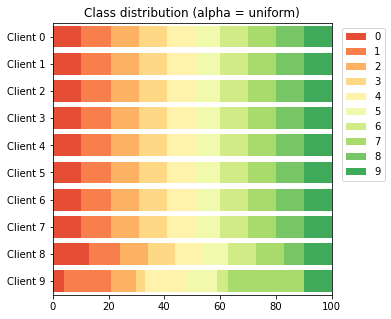

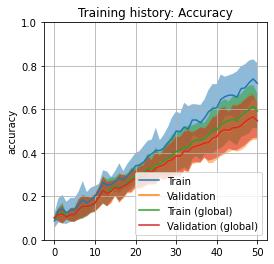

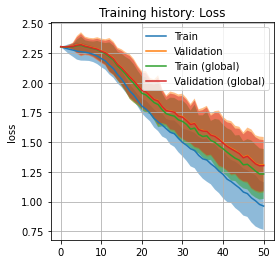

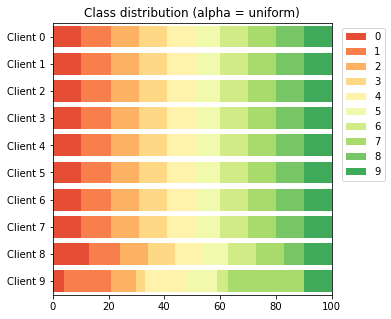

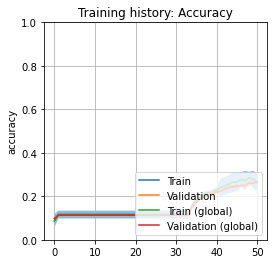

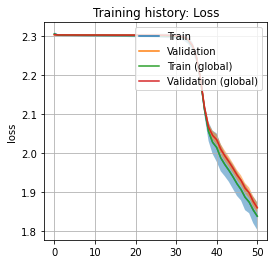

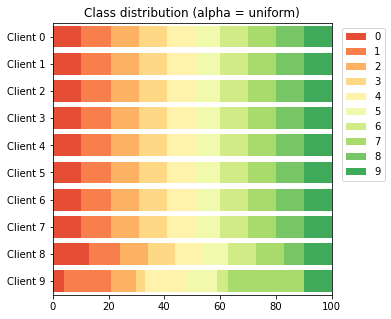

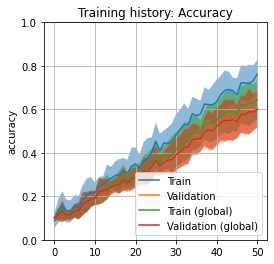

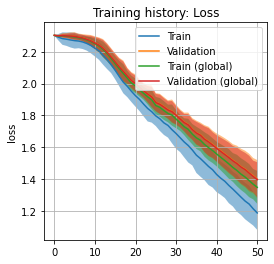

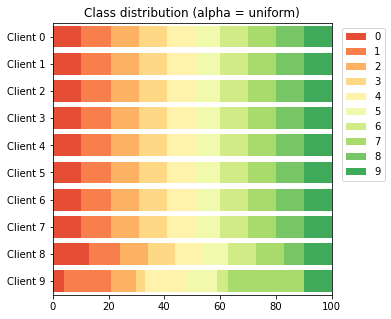

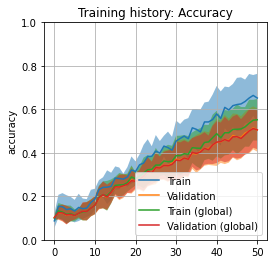

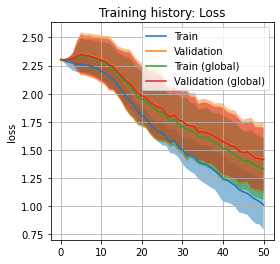

In [46]:
# Figure FMNIST
dataset = "MNIST"
model = "LeNet5"
reduced = 0.05
rounds = 100
n_avg = 10
track_history = 1
export_dir = "./saves/MNIST_test"
device = "cuda:7"
n_clients = 10

# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device)


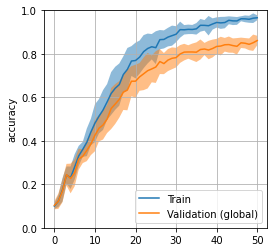

In [39]:
hlp.plot_global_training_history(pt_kd, metric="accuracy", which=["Train", "Validation (global)"])

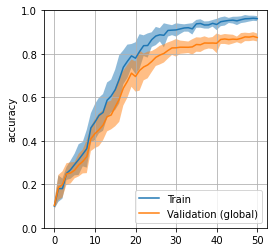

In [40]:
hlp.plot_global_training_history(pt_fd, metric="accuracy", which=["Train", "Validation (global)"])

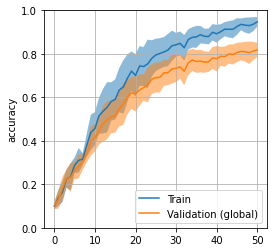

In [41]:
hlp.plot_global_training_history(pt_il, metric="accuracy", which=["Train", "Validation (global)"])

Running IL with 1 clients
Device: cuda
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (5000, 3, 32, 32) (61.48 MB)
	- Validation (1000, 3, 32, 32) (12.296 MB)
Round 25 done. (8.7s)      
Done.


NameError: name 'pt_kd' is not defined

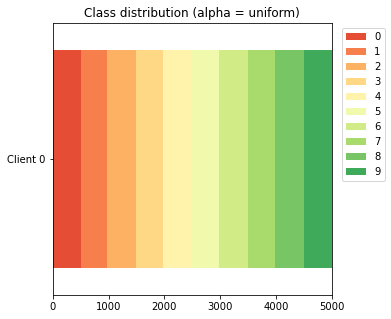

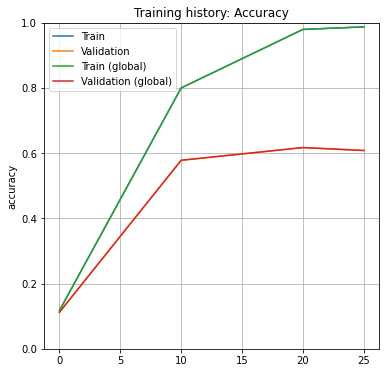

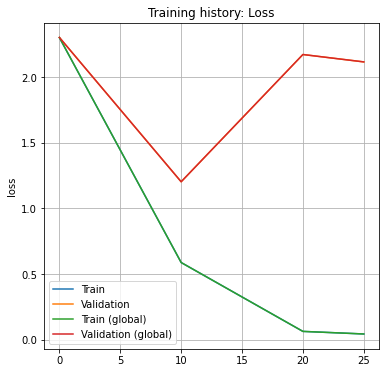

In [17]:
# Figure FMNIST
dataset = "CIFAR10"
model = "ResNet18"
reduced = 0.1
rounds = 25
n_avg=16
track_history = 10
export_dir = "./saves/CIFAR10_test"
n_clients_list = range(1,2)

# Experiment
pt_kd_list = []
pt_fl_list = []
pt_fd_list = [] 
pt_il_list = []
for n_clients in n_clients_list:
    pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, 
                                           model=model, reduced=reduced,  feature_dim=100,
                                           n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                           export_dir=export_dir)
    #pt = run(n_clients=n_clients, dataset=dataset, model=model, reduced=reduced,  feature_dim=256, rounds=rounds, track_history=track_history, preset="il", export_dir=export_dir)
    
    pt_kd_list.append(pt_kd)
    pt_fl_list.append(pt_fl)
    pt_fd_list.append(pt_fd)
    pt_il_list.append(pt_il)
    plt.close("all")

generate_plots(n_clients_list, pt_kd_list, pt_fl_list, pt_fd_list, pt_il_list, export_dir)

****************************************
Running CFKD with 4 clients
Device: cuda
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (5000, 3, 32, 32) (61.48 MB)
	- Validation (1000, 3, 32, 32) (12.296 MB)
Round 25 done. (15.2s)      
Done.
********************
Running FL with 4 clients
Device: cuda
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (5000, 3, 32, 32) (61.48 MB)
	- Validation (1000, 3, 32, 32) (12.296 MB)
Round 25 done. (12.0s)      
Done.
********************
Running FD with 4 clients
Device: cuda
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (5000, 3, 32, 32) (61.48 MB)
	- Validation (1000, 3, 32, 32) (12.296 MB)
Round 25 done. (12.3s) 

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 10.92 GiB total capacity; 2.13 GiB already allocated; 4.44 MiB free; 2.27 GiB reserved in total by PyTorch)

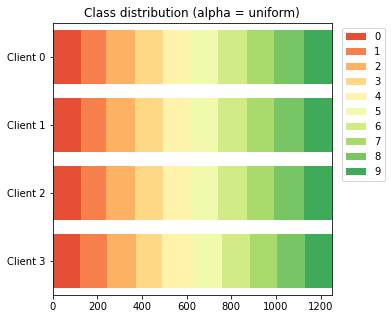

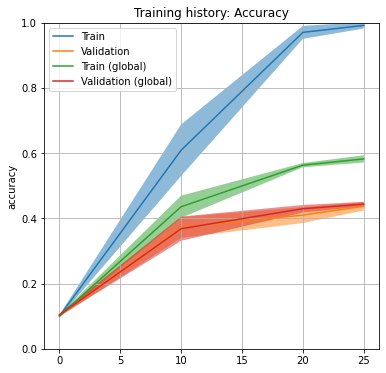

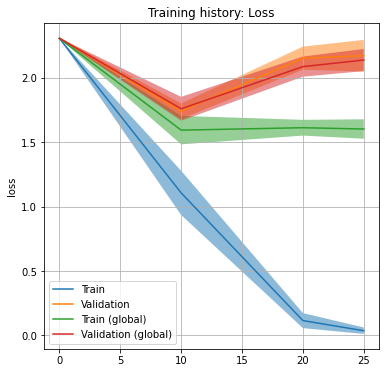

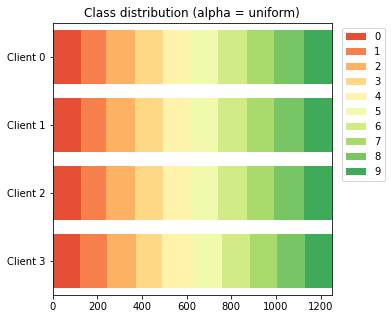

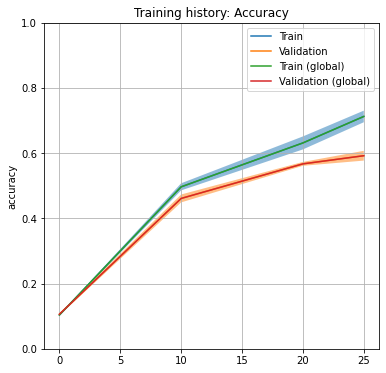

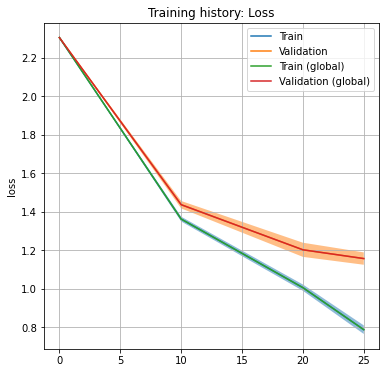

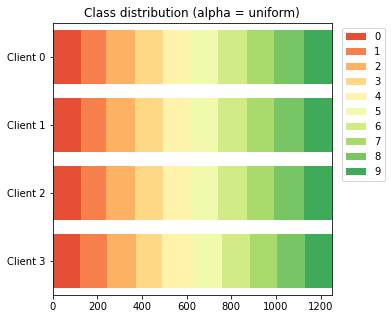

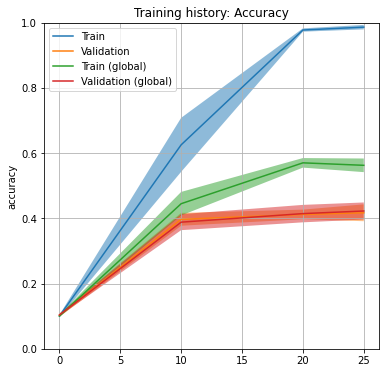

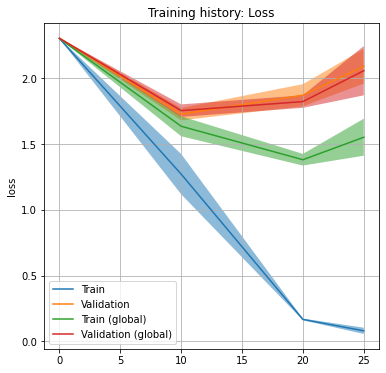

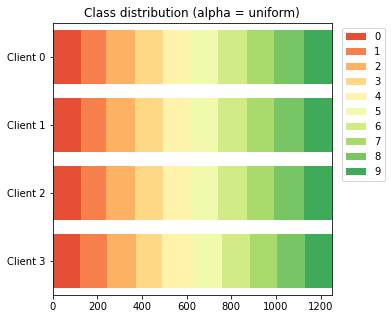

In [18]:
dataset = "CIFAR10"
model = "ResNet18"
reduced = 0.1
rounds = 25
n_avg = 16
track_history = 10
export_dir = "./saves/CIFAR10_test"
n_clients = 4
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, 
                                    model=model, reduced=reduced,  feature_dim=100,
                                    n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                    export_dir=export_dir)

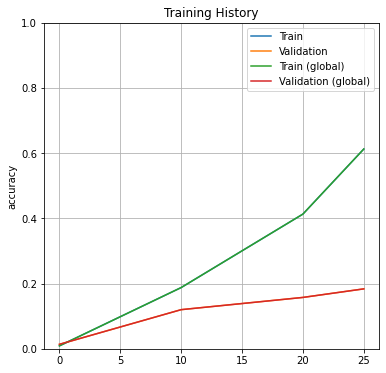

In [15]:
hlp.plot_global_training_history(pt, metric="accuracy")